In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from collections import Counter
import re

In [3]:
try:
    stopwords.words('english')
except LookupError:
    print("NLTK stopwords not found. Downloading...")
    nltk.download('stopwords')
    print("Download complete.")

In [ ]:
# Load data
df = pd.read_csv('../data/newsData/raw_analyst_ratings.csv')
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


## Data Cleaning and Preparation

In [ ]:
# Drop rows where 'headline' is missing
df.dropna(subset=['headline'], inplace=True)

# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'], format='mixed', utc=True)
print("Data cleaning complete.")
print("Data shape after cleaning:", df.shape)
print("\nData types:")
df.info()


Data cleaning complete.
Data shape after cleaning: (1407328, 6)

Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype              
---  ------      --------------    -----              
 0   Unnamed: 0  1407328 non-null  int64              
 1   headline    1407328 non-null  object             
 2   url         1407328 non-null  object             
 3   publisher   1407328 non-null  object             
 4   date        1407328 non-null  datetime64[ns, UTC]
 5   stock       1407328 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 64.4+ MB


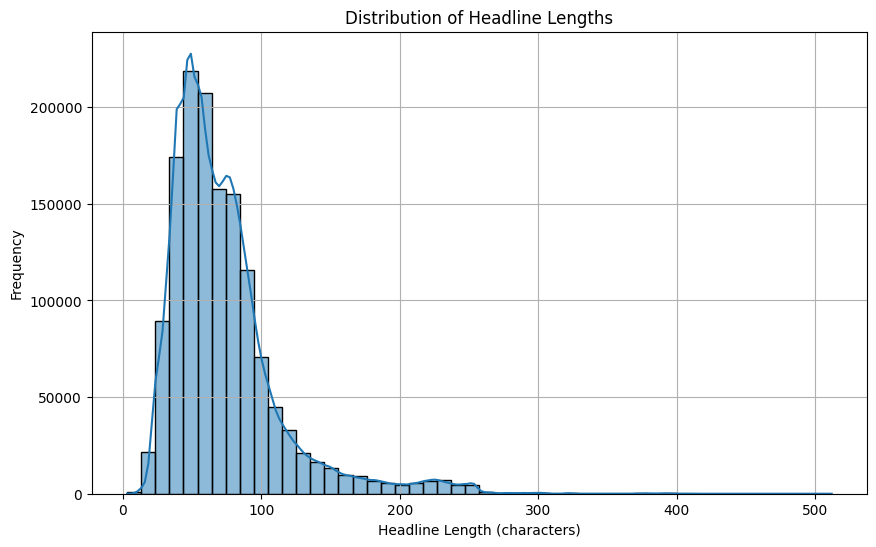

In [8]:
# Descriptive Statistics
df['headline_length'] = df['headline'].str.len()
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=50, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length (characters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

/tmp/ipykernel_27543/261137245.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')


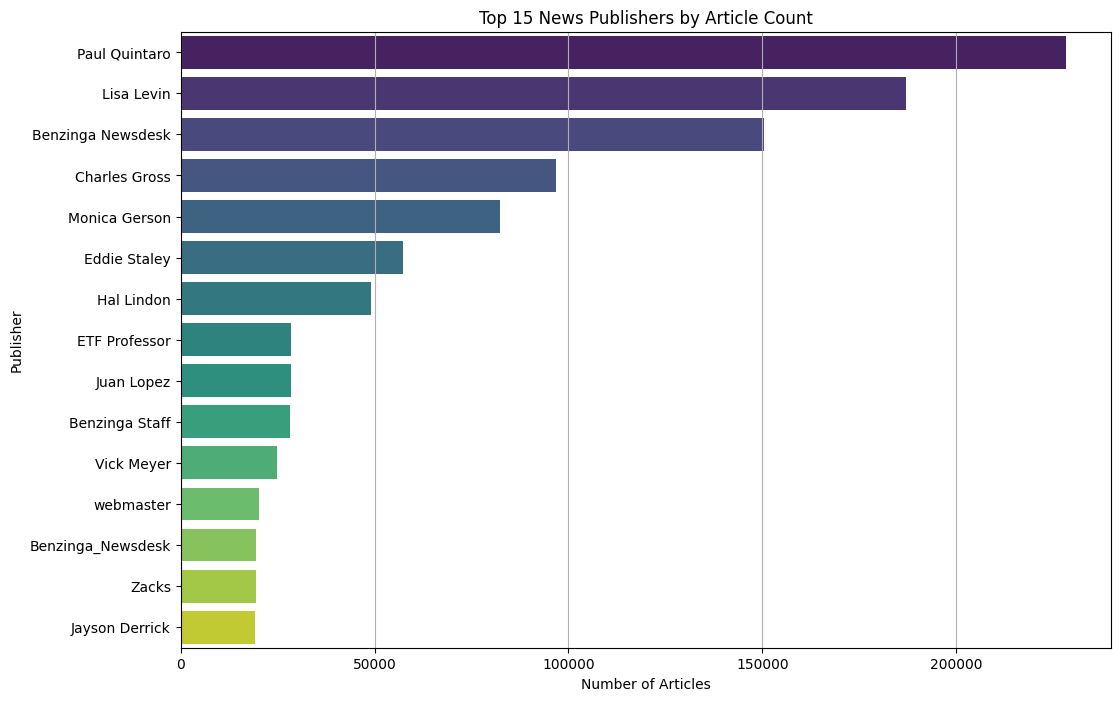

In [9]:
# Publisher Analysis (Top 15)
top_publishers = df['publisher'].value_counts().nlargest(15)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')
plt.title('Top 15 News Publishers by Article Count')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.grid(axis='x')
plt.show()

## Text Analysis (Topic Modeling)

In [20]:
## 2. Text Analysis: Identifying Common Keywords
print("\n--- 2. Identifying Top 20 Common Keywords in Headlines ---")

# 1. Combine all headlines into a single string
all_headlines = ' '.join(df['headline'].astype(str).str.lower())

# 2. Tokenize the text (split into words)
words = re.findall(r'\b\w+\b', all_headlines)

# 3. Define stop words
stop_words = set(stopwords.words('english'))

# 4. Filter out stop words and single-letter words
filtered_words = [word for word in words if word not in stop_words and len(word) > 1]

# 5. Count the frequency of each filtered word
word_counts = Counter(filtered_words)

# Display the top 20 most common keywords
top_keywords = word_counts.most_common(20)
print("Keyword | Count")
for word, count in top_keywords:
    print(f"{word.ljust(10)}| {count}")

# *Next Step:* For full Topic Modeling, you would use scikit-learn's TfidfVectorizer and LatentDirichletAllocation.


--- 2. Identifying Top 20 Common Keywords in Headlines ---
Keyword | Count
vs        | 162099
stocks    | 161776
est       | 140604
eps       | 128897
market    | 120558
shares    | 114313
reports   | 108710
update    | 91723
earnings  | 87399
sales     | 79645
top       | 79632
benzinga  | 74516
pt        | 73068
week      | 69572
announces | 66591
price     | 64407
buy       | 64371
mid       | 62263
downgrades| 61959
trading   | 61182


### Time Series Analysis 
 


--- 1. Analyzing Publication Trend with 7-Day Moving Average ---


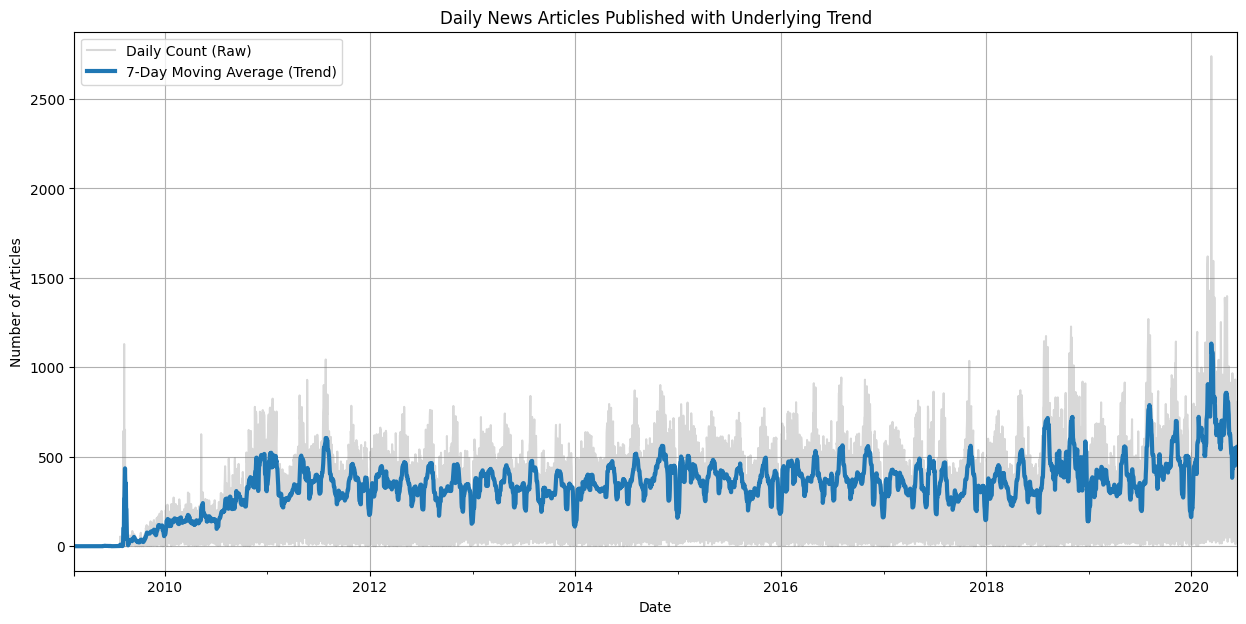

In [25]:
## 1. Publication Frequency Over Time (Trend)
print("\n--- 1. Analyzing Publication Trend with 7-Day Moving Average ---")
articles_per_day = df_ts.resample('D').size()
articles_per_day_ma7 = articles_per_day.rolling(window=7).mean()

plt.figure(figsize=(15, 7))
articles_per_day.plot(label='Daily Count (Raw)', alpha=0.3, color='grey')
articles_per_day_ma7.plot(label='7-Day Moving Average (Trend)', linewidth=3, color='tab:blue')

plt.title('Daily News Articles Published with Underlying Trend')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend()
plt.grid(True)
# plt.show()


--- 2. Identifying Publication Spikes/Outliers ---
Mean Daily Articles: 340.26
Spike Threshold (3-sigma): 1194.56 articles/day

Dates with significant spikes (potential market events):
date
2018-10-30 00:00:00+00:00    1228
2019-08-01 00:00:00+00:00    1270
2020-01-22 00:00:00+00:00    1198
2020-02-27 00:00:00+00:00    1567
2020-02-28 00:00:00+00:00    1620
2020-03-06 00:00:00+00:00    1428
2020-03-11 00:00:00+00:00    1384
2020-03-12 00:00:00+00:00    2739
2020-03-19 00:00:00+00:00    1595
2020-03-23 00:00:00+00:00    1391
2020-04-15 00:00:00+00:00    1253
2020-04-29 00:00:00+00:00    1389
2020-04-30 00:00:00+00:00    1327
2020-05-07 00:00:00+00:00    1398
dtype: int64


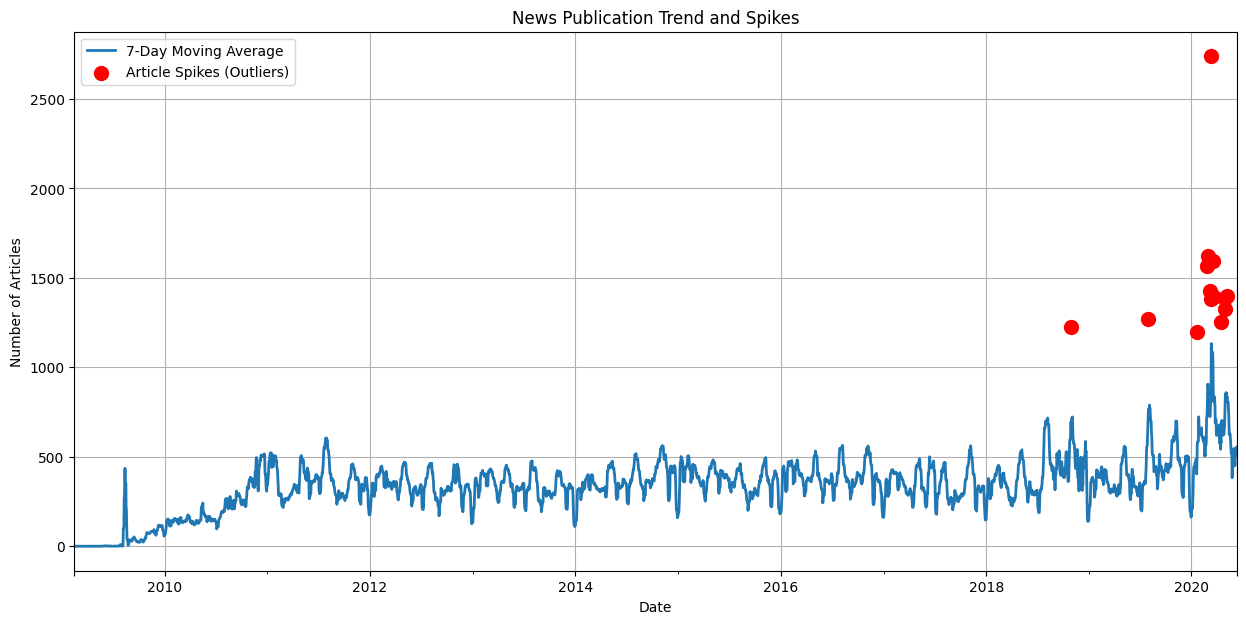

In [22]:
## 2. Identifying Spikes/Outliers Related to Events
print("\n--- 2. Identifying Publication Spikes/Outliers ---")

# Calculate the mean and standard deviation of daily counts
daily_mean = articles_per_day.mean()
daily_std = articles_per_day.std()

# Define a spike threshold (e.g., more than 3 standard deviations above the mean)
spike_threshold = daily_mean + (3 * daily_std)

# Find dates where the daily count exceeds the threshold
spike_dates = articles_per_day[articles_per_day > spike_threshold]

print(f"Mean Daily Articles: {daily_mean:.2f}")
print(f"Spike Threshold (3-sigma): {spike_threshold:.2f} articles/day\n")
print("Dates with significant spikes (potential market events):")
print(spike_dates)

# You can now plot these spikes over the trend line
plt.figure(figsize=(15, 7))
articles_per_day_ma7.plot(label='7-Day Moving Average', linewidth=2, color='tab:blue')
# Plot the spikes as distinct markers
plt.scatter(spike_dates.index, spike_dates.values, color='red', s=100, label='Article Spikes (Outliers)', zorder=5)

plt.title('News Publication Trend and Spikes')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend()
plt.grid(True)
plt.show()


--- 3. Analyzing Intraday Publication Time (Excluding Hour 00) ---
The TRUE Peak News Publication Time (excluding Hour 00) is Hour 14 with a total of 7669 articles.


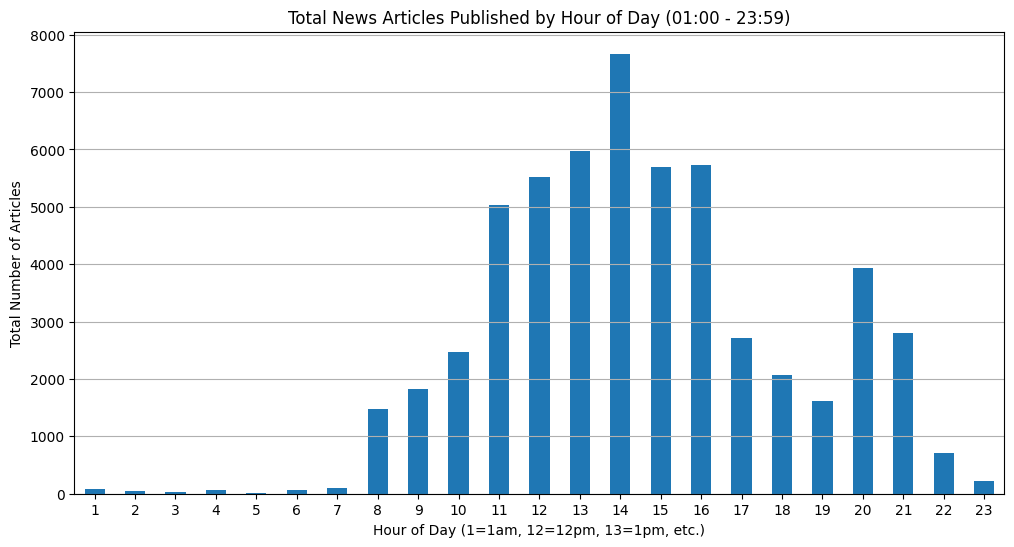

In [26]:
## 3. Analysis of Publishing Times (Intraday Pattern) - REVISED
print("\n--- 3. Analyzing Intraday Publication Time (Excluding Hour 00) ---")

# 1. Filter out all rows where the hour component is 0 (i.e., Midnight articles)
# df_ts is the time series DataFrame with 'date' as index
df_ts_filtered = df_ts[df_ts.index.hour != 0]

# 2. Group the remaining articles by the hour of the day
articles_by_hour_filtered = df_ts_filtered.groupby(df_ts_filtered.index.hour).size()

plt.figure(figsize=(12, 6))
articles_by_hour_filtered.plot(kind='bar')

plt.title('Total News Articles Published by Hour of Day (01:00 - 23:59)')
plt.xlabel('Hour of Day (1=1am, 12=12pm, 13=1pm, etc.)')
plt.ylabel('Total Number of Articles')
plt.xticks(rotation=0)
plt.grid(axis='y')
# plt.show()

# Find the peak hour in the filtered data
peak_hour = articles_by_hour_filtered.idxmax()
peak_count = articles_by_hour_filtered.max()

print(f"The TRUE Peak News Publication Time (excluding Hour 00) is Hour {peak_hour:02d} with a total of {peak_count} articles.")

## Publisher Analysis

In [21]:
from urllib.parse import urlparse

## 3A. Identifying Unique Domains (for email/URL-based publisher names)
print("\n--- 3A. Top 10 Domains/Organizations ---")

# Function to extract domain from a string (assuming email or URL format)
def extract_domain(publisher_name):
    name = str(publisher_name).lower()
    if '@' in name:
        # Assuming email format (e.g., 'user@domain.com')
        return name.split('@')[-1]
    elif '.' in name:
        # Assuming URL format (e.g., 'www.domain.com')
        try:
            domain = urlparse(f'http://{name}').netloc # Add scheme for parsing
            return domain if domain else name
        except:
            return name
    else:
        # Standard publisher name
        return name

# Apply the function to create a new 'domain' column
df['publisher_domain'] = df['publisher'].apply(extract_domain)

# Count the frequency of each domain/organization
domain_counts = df['publisher_domain'].value_counts()

# Display the top 10 domains
print(domain_counts.head(10))

# *Next Step:* You can now compare the topics/keywords used by the top 3-5 domains to see if they report different types of news.


--- 3A. Top 10 Domains/Organizations ---
publisher_domain
paul quintaro        228373
lisa levin           186979
benzinga newsdesk    150484
charles gross         96732
monica gerson         82380
eddie staley          57254
hal lindon            49047
etf professor         28489
juan lopez            28438
benzinga staff        28114
Name: count, dtype: int64
